In [70]:
# FS plots of stripe imagery and its Fourier Transforms, 2015-10-20.

%matplotlib notebook

import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from scipy import misc
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq

<IPython.core.display.Javascript object>


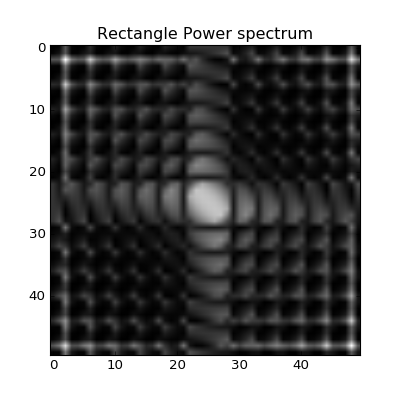

<IPython.core.display.Javascript object>


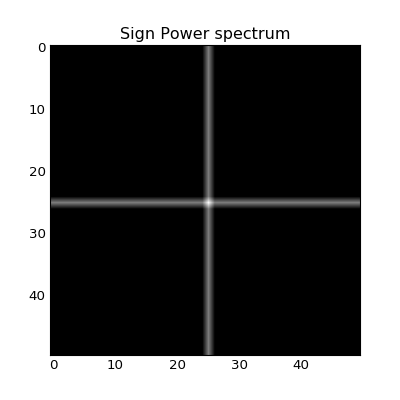

<IPython.core.display.Javascript object>


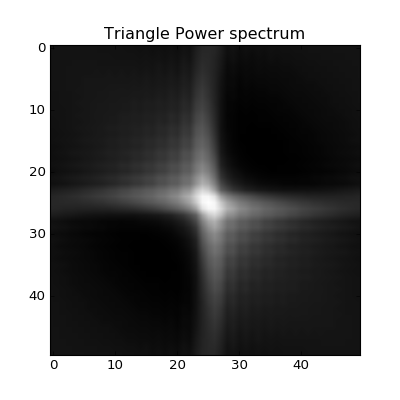

In [76]:
# This is confusing but for some reason these methods are in NumPy only, not SciPy
from numpy.fft import rfft2, irfft2, rfftfreq

from scipy.io import wavfile

#produce 1-D vectors to be the 2-D image
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
#use specific function to create signal (1-D)    
def signal(func, time):
    i = 0
    result = [0.0]*len(time)
    for t in time:
        result[i] = func(t)
        i=i+1
    return result

#rectangle function
def rect(t):
    if np.abs(t) > 1/2:
        return 0
    elif np.abs(t) == 1/2:
         return 1/2
    elif np.abs(t) < 1/2:
        return 1

#signum function
def signum(t):
    return np.sign(t)

#triangle function
def triangle(t):
    if np.abs(t) < 1:
        return 1-np.abs(t)
    else:
        return 0

#first calculate the 2D signal and calculate the power spectrum
def power(signal1D):
    signal2D = np.zeros([len(signal1D),len(signal1D)])
    for x in range(0, len(signal1D)):
        for y in range(0, len(signal1D)):
            signal2D[x][y] = signal1D[x] * signal1D[y]
    fft = np.fft.fftshift(np.log(fft2(signal2D)),axes=(0,1))
    power = np.abs(fft**2)
    return signal2D, fft, power

space_plot = 2
space_density = 25
space_array = np.linspace(0, space_plot, space_plot*space_density)

#rectangle
rect_array = signal(rect, space_array)
rect_signal2D, rect_fft, rect_power = power(rect_array)

#signum
signum_array = signal(signum, space_array)
signum_signal2D, signum_fft, signum_power = power(signum_array)

#triangle
triangle_array = signal(triangle, space_array)
triangle_signal2D, triangle_fft, triangle_power = power(triangle_array)

#plot
def plot(power, name):
    fig = plt.figure(figsize=(5, 5))
    power_fig = fig.add_subplot(1,1,1)
    power_fig.set_title(name +" Power spectrum")
    power_fig.imshow(power,cmap=cm.Greys_r)

plot(rect_power, "Rectangle")
plot(signum_power, "Sign")
plot(triangle_power, "Triangle")